In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [120]:
import numpy as np

from BZI.symmetry import find_orbitals, make_ptvecs, HermiteNormalForm, Lattice, point_group
from BZI.sampling import make_cell_points, make_grid
from BZI.plots import PlotMesh

# Test

In [207]:
lat_centering = "face"
lat_consts = [4./3]*3
lat_angles = [np.pi/2]*3
lat_vecs = make_ptvecs(lat_centering, lat_consts, lat_angles)

# grid_centering = "prim"
# grid_consts = [.4, .4, .4]
# grid_angles = [np.pi/2]*3
# grid_vecs = make_ptvecs(grid_centering, grid_consts, grid_angles)
offset = np.array([1.5, 1.5, 0.])

H = np.array([[3,0,0],[2,3,0],[2,2,3]])
grid_vecs = np.dot(lat_vecs, np.linalg.inv(H))
grid = make_cell_points(lat_vecs, grid_vecs, offset)

<IPython.core.display.Javascript object>


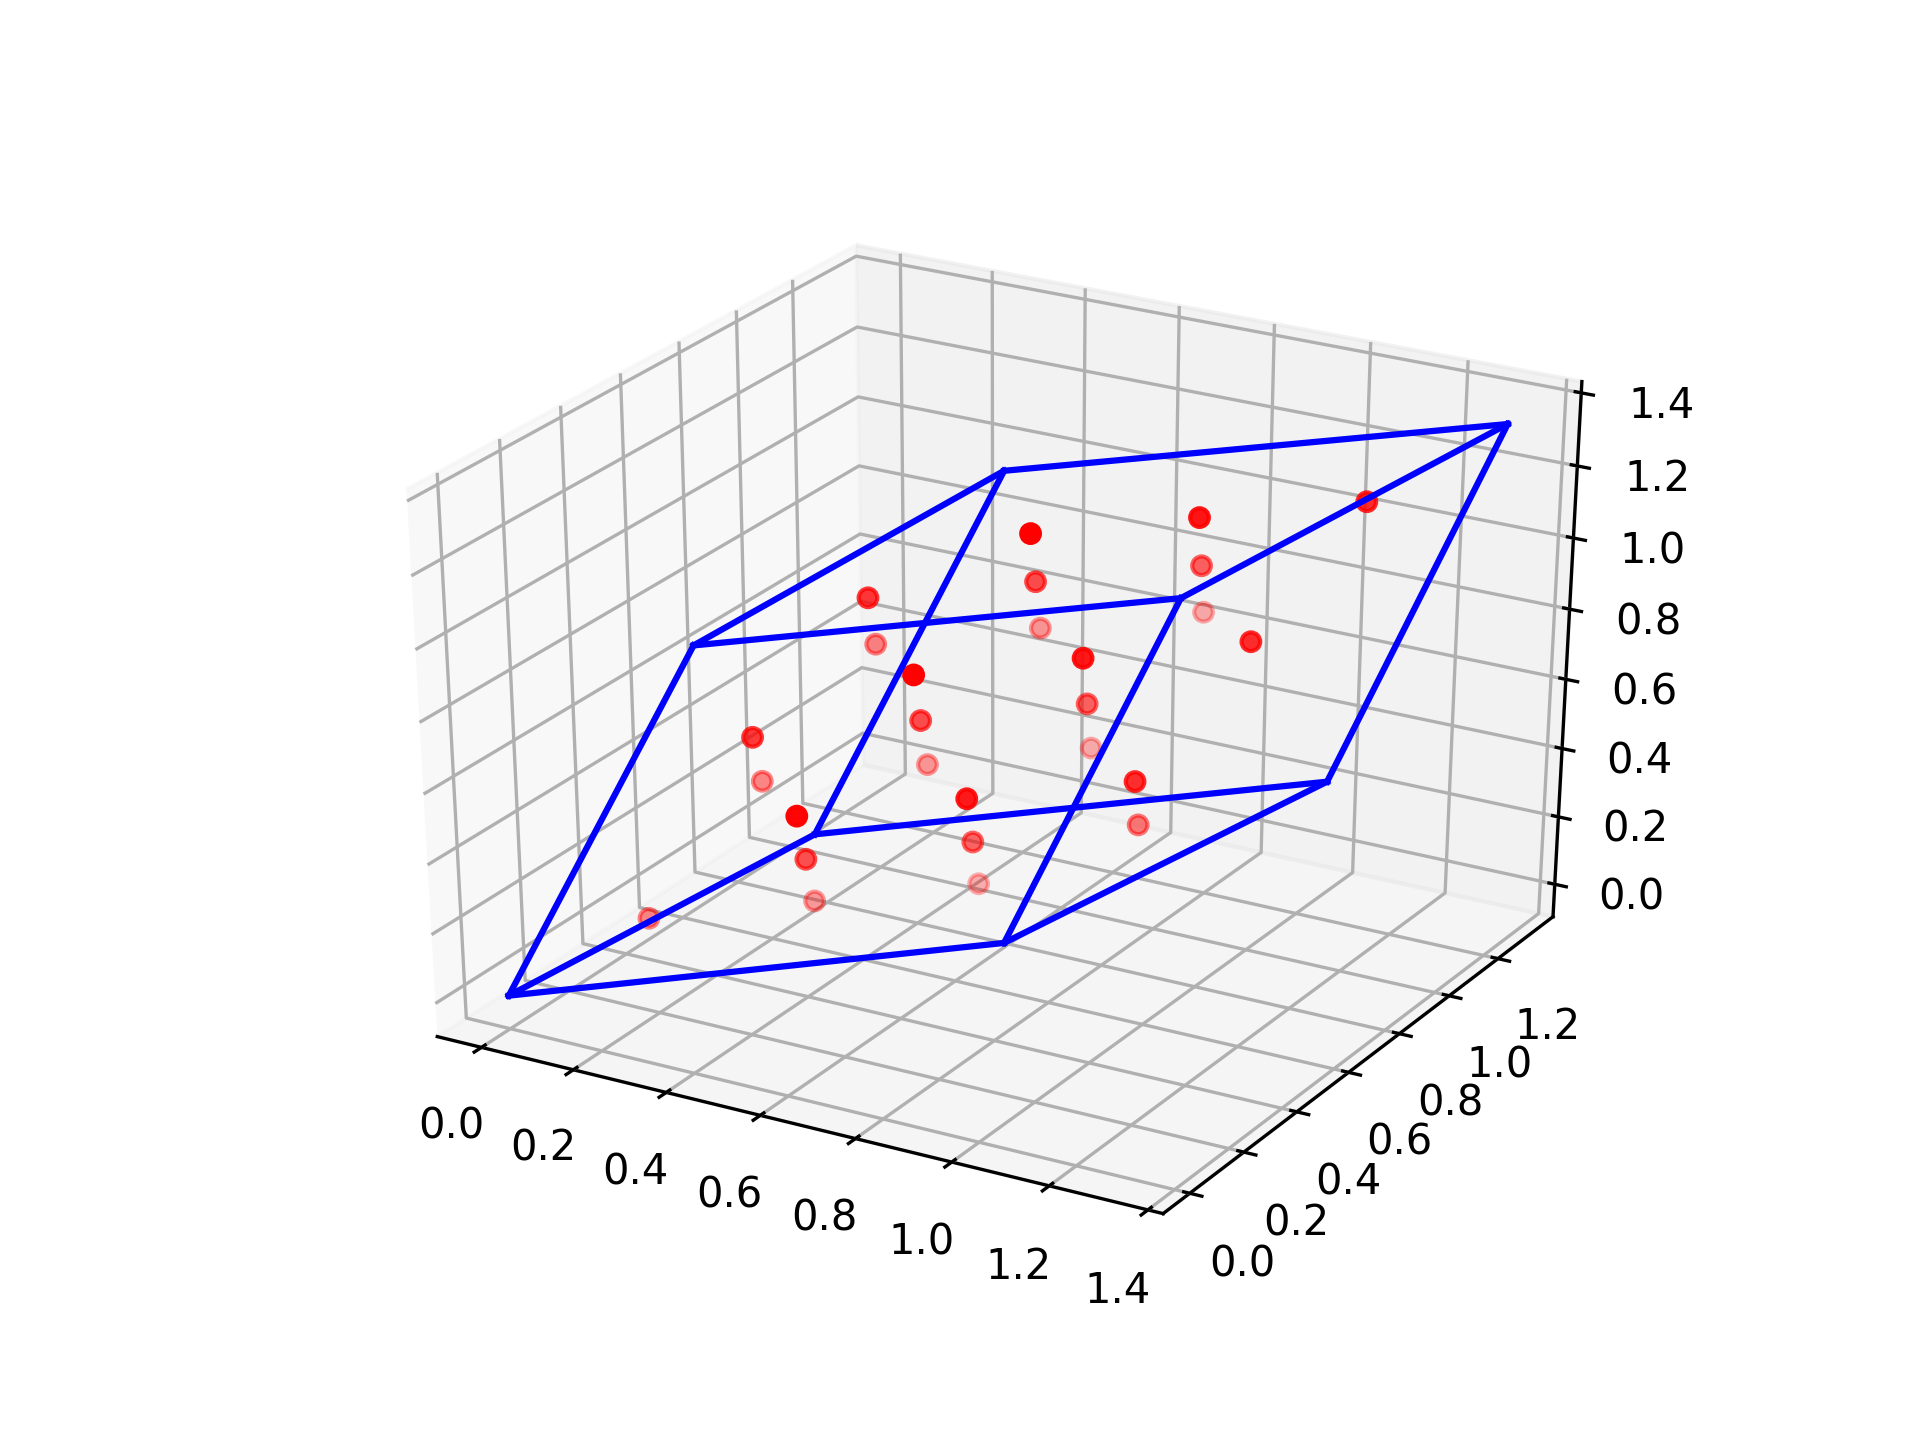

In [208]:
PlotMesh(grid, lat_vecs)

In [209]:
orbs = find_orbitals(grid, lat_vecs)

In [210]:
for k in orbs.keys():
    print(len(orbs[k]))
    print(np.round(orbs[k], 3))

2
[[ 0.679  0.531  0.37 ]
 [ 0.654  0.802  0.963]]
2
[[ 0.457  0.309  0.37 ]
 [ 0.877  1.025  0.963]]
2
[[ 0.901  0.753  0.37 ]
 [ 0.432  0.58   0.963]]
2
[[ 0.605  0.679  0.148]
 [ 0.728  0.654  1.185]]
2
[[ 0.383  0.457  0.148]
 [ 0.951  0.877  1.185]]
2
[[ 0.16   0.235  0.148]
 [ 1.173  1.099  1.185]]
2
[[ 0.531  0.16   0.593]
 [ 0.802  1.173  0.741]]
2
[[ 0.975  0.605  0.593]
 [ 0.358  0.728  0.741]]
2
[[ 0.753  0.383  0.593]
 [ 0.58   0.951  0.741]]
2
[[ 1.074  0.852  0.889]
 [ 0.259  0.481  0.444]]
2
[[ 0.852  0.63   0.889]
 [ 0.481  0.704  0.444]]
2
[[ 0.63   0.407  0.889]
 [ 0.704  0.926  0.444]]
1
[[ 0.333  0.333  0.667]]
2
[[ 0.778  0.778  0.667]
 [ 0.556  0.556  0.667]]
